<a href="https://colab.research.google.com/github/ThanuMahee12/ayush-vision/blob/dcnn/Algorithums/DCNN/DCNN_Leaves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install firebase-admin

In [1]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense,Activation,BatchNormalization
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
import numpy as np
import os
from datetime import date,datetime
import json
import csv

In [12]:
firebase_count=1

In [2]:
dataset_path = '/content/drive/MyDrive/AYUSHVISION/working'

In [3]:
import firebase_admin

In [4]:
from firebase_admin import credentials,storage


In [5]:
from firebase_admin import firestore

In [6]:
epochs=10

In [7]:
document_id=f'{datetime.now().strftime("%Y_%m_%d_%H")}_{epochs}'
storageLocation=f'training/dcnn/leaves/'

In [8]:
working_dir=f'/content/drive/MyDrive/AYUSHVISION/ready/{document_id}'

# firebase

In [16]:

if firebase_count==1:
  cred = credentials.Certificate("/content/drive/MyDrive/AYUSHVISION/ServiceKey.json")
  firebase_admin.initialize_app(cred,{
    'storageBucket': 'ayush-vision-asw4gh.appspot.com'
})
firebase_count=firebase_count+1

In [17]:
db = firestore.client()

In [18]:
bucket = storage.bucket()

In [19]:
dcnn_ref = db.collection("training1").document('dcnn')
doc = dcnn_ref.get()

In [20]:
if not doc.exists:
  doc_ref= db.collection("training1").document('dcnn')
  doc_ref.set({'algorithum':'dcnn','version':'1','mode':'classification','url':'dcnn'})
else:
  doc_ref= dcnn_ref

### Colab

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
basicdata={'account':'thanumahee440@gmail.com','user':"Tharsha"}

In [22]:
basicdata['imageSize']=[224,224]
basicdata['project']=working_dir
basicdata['name']=document_id
basicdata['training_date']=datetime.now().strftime("%Y/%m/%d %H:%M:%S")
basicdata['filename']='DCNN_Leaves'


In [23]:
basicdata['names']=os.listdir(os.path.join(dataset_path,'train'))

In [24]:
today_ref=doc_ref.collection("Leaves").document(document_id)

In [25]:
today_ref.set(basicdata)

update_time {
  seconds: 1726030228
  nanos: 342199000
}

In [26]:
if not os.path.exists(working_dir):
  os.makedirs(working_dir)

In [27]:
train_data_dir = f'{dataset_path}/train'
train_datagen = image.ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    class_mode='categorical'
)

Found 11239 images belonging to 32 classes.


In [31]:
for root,dirs,files in os.walk(f'{dataset_path}/val'):
  for file in files:
    print(file)

In [28]:
validation_data_dir = f'{dataset_path}/val'
validation_datagen = image.ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(224, 224),
    class_mode='categorical'
)

Found 0 images belonging to 32 classes.


In [29]:
test_data_dir = f'{dataset_path}/test'
test_datagen = image.ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(224, 224),
    class_mode='categorical'
)

Found 0 images belonging to 32 classes.


In [ ]:
# Build the CNN model
model=Sequential()
#Adding convolution layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#Adding convolution layer
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#Adding convolution layer
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#Adding dense layersa
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(32,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 222, 222, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 109, 109, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 52, 52, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      44,302,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │          16,416 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,415,456 (169.43 MB)

 Trainable params: 44,413,984 (169.43 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [ ]:
args=json.loads(model.to_json())

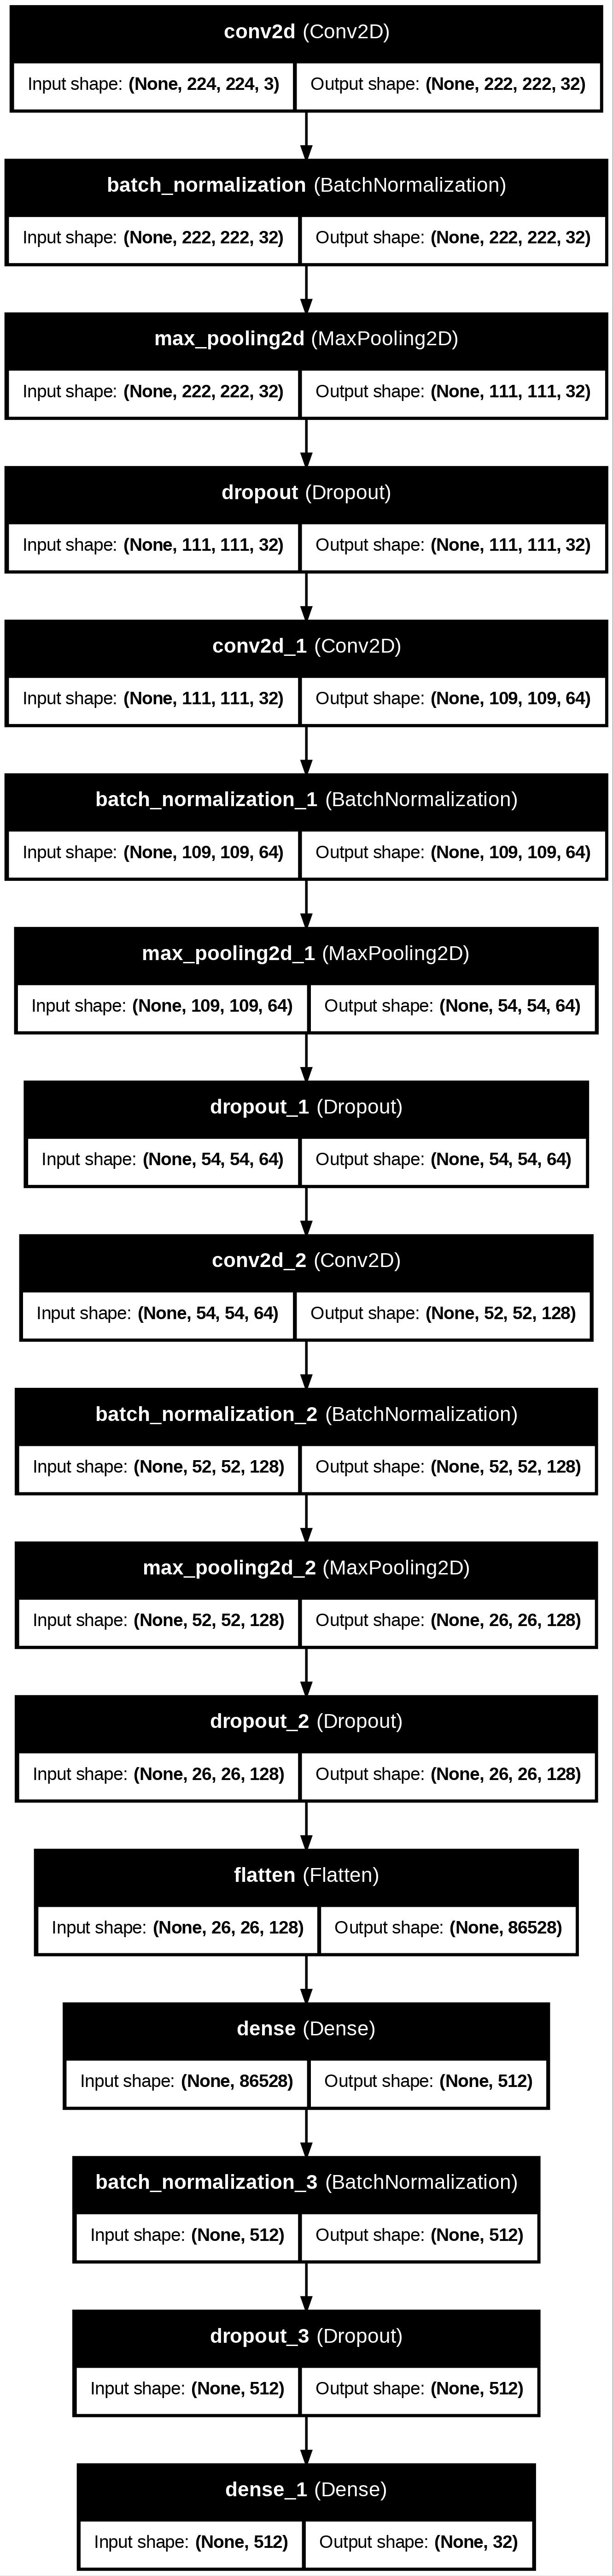

In [ ]:
plot_model(model, to_file= f'{working_dir}/dcnn{epochs}.jpg' , show_shapes=True, show_layer_names=True)

In [ ]:
blob = bucket.blob(f"{storageLocation+document_id}/train/model_summary{document_id}.jpg")
blob.upload_from_filename(f'{working_dir}/dcnn{epochs}.jpg')
blob.make_public()

In [ ]:
today_training_colref=today_ref.collection('Train')

In [ ]:
today_training_ref=today_training_colref.document('args')

In [ ]:
today_training_ref.set(args)

update_time {
  seconds: 1725424464
  nanos: 778866000
}

In [ ]:
today_training_summary_ref=today_training_colref.document('model_summary_plot')

In [ ]:
today_training_summary_ref.set({
    'url':blob.public_url
})

In [ ]:
# compile model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
todat_fit_train_ref=today_training_colref.document('fit')

In [ ]:
todat_fit_train_ref.set({
    'epochs':epochs,
    'loss':"categorical_crossentropy",
    'optimizer':optimizer.get_config()

})

update_time {
  seconds: 1725424481
  nanos: 794195000
}

In [ ]:
# train the model
history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 95/421 ━━━━━━━━━━━━━━━━━━━━ 2:05:11 23s/step - accuracy: 0.0974 - loss: 4.0689

UnknownError: Graph execution error:

Detected at node PyFunc defined at (most recent call last):
<stack traces unavailable>
Detected at node PyFunc defined at (most recent call last):
<stack traces unavailable>
2 root error(s) found.
  (0) UNKNOWN:  UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7a217a761620>
Traceback (most recent call last):

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/ops/script_ops.py", line 270, in __call__
    ret = func(*args)

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/autograph/impl/api.py", line 643, in wrapper
    return func(*args, **kwargs)

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/from_generator_op.py", line 198, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py", line 260, in _get_iterator
    for i, batch in enumerate(gen_fn()):

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py", line 253, in generator_fn
    yield self.py_dataset[i]

  File "/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py", line 68, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)

  File "/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py", line 313, in _get_batches_of_transformed_samples
    img = image_utils.load_img(

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/image_utils.py", line 236, in load_img
    img = pil_image.open(io.BytesIO(f.read()))

  File "/usr/local/lib/python3.10/dist-packages/PIL/Image.py", line 3283, in open
    raise UnidentifiedImageError(msg)

PIL.UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7a217a761620>


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]]
	 [[IteratorGetNext/_2]]
  (1) UNKNOWN:  UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7a217a761620>
Traceback (most recent call last):

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/ops/script_ops.py", line 270, in __call__
    ret = func(*args)

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/autograph/impl/api.py", line 643, in wrapper
    return func(*args, **kwargs)

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/from_generator_op.py", line 198, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py", line 260, in _get_iterator
    for i, batch in enumerate(gen_fn()):

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py", line 253, in generator_fn
    yield self.py_dataset[i]

  File "/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py", line 68, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)

  File "/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py", line 313, in _get_batches_of_transformed_samples
    img = image_utils.load_img(

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/image_utils.py", line 236, in load_img
    img = pil_image.open(io.BytesIO(f.read()))

  File "/usr/local/lib/python3.10/dist-packages/PIL/Image.py", line 3283, in open
    raise UnidentifiedImageError(msg)

PIL.UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7a217a761620>


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]]
0 successful operations.
0 derived errors ignored. [Op:__inference_one_step_on_iterator_4148]

In [ ]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.savefig(f"{working_dir}/dcnn{epochs}_model_accuracy.jpg")
plt.show()

In [ ]:
blob = bucket.blob(f"{storageLocation+document_id}/val/training_plot{document_id}.jpg")
blob.upload_from_filename(f'{working_dir}/dcnn{epochs}_model_accuracy.jpg')
blob.make_public()

In [ ]:
validationref=today_ref.collection('Val')

In [ ]:
valhistory_ref=validationref.document('history')
valaccuracy_ref=validationref.document('accuracy_plot')

In [ ]:
valhistory_ref.set(
    history.history
)

In [ ]:
valaccuracy_ref.set({
    'url':blob.public_url
})

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 869ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Test Accuracy: 100.00%


In [ ]:
testref=today_ref.collection('Test')

In [ ]:
test_accuracy_loss=testref.document('test_accuracy_lost')
test_accuracy_loss.set({
    'accuracy':test_accuracy,
    'loss':test_loss
})

In [ ]:
modelref=today_ref.collection('Model')

In [ ]:
model.save(f'{working_dir}/dcnn_leaves_{epochs}.h5',)

In [ ]:
savemodel=modelref.document('model')

In [ ]:
blob = bucket.blob(f"{storageLocation+document_id}/model/dcnn_flower_{epochs}.h5")
blob.upload_from_filename(f'{working_dir}/dcnn_flower_{epochs}.h5')
blob.make_public()
h5model=blob.public_url

In [ ]:
savemodel.set({'model':h5model})

In [ ]:
directory_path = 'sample/predict'
# List all files in the specified directory
files = os.listdir(directory_path)

# Iterate through the files and move those starting with 'dog_' to the 'dog' folder
for file in files:
    image_path = os.path.join(directory_path, file)

    if os.path.isfile(os.path.join(directory_path, file)):
        # Load and preprocess the image
        img = image.load_img(image_path, target_size=(150, 150))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)  # Add an extra dimension to match the model's expected input shape
        img_array /= 255.0  # Normalize pixel values to be in the range [0, 1]

        # Make a prediction
        prediction = model.predict(img_array)
        print(prediction)

        # `predictions` is a numpy array containing the predicted probabilities for each class
        # You can further process these predictions based on your specific use case
        # Assuming you have `predictions` from the previous code

        # Get the predicted class index
        predicted_class_index = np.argmax(prediction)

        # Define your class labels
        class_labels = ['cat', 'dog']

        # Get the corresponding class label
        predicted_class_label = class_labels[predicted_class_index]

        # Get the confidence score for the predicted class
        confidence_score = prediction[0, predicted_class_index]

        # Display the results
        print(f'Predicted Class: {predicted_class_label}')
        print(f'Confidence Score: {confidence_score * 100:.2f}%')


1/1 [==============================] - 0s 125ms/step
[[9.99884605e-01 1.15348936e-04]]
Predicted Class: cat
Confidence Score: 99.99%
1/1 [==============================] - 0s 85ms/step
[[9.999260e-01 7.405674e-05]]
Predicted Class: cat
Confidence Score: 99.99%
1/1 [==============================] - 0s 82ms/step
[[0.4278868  0.57211316]]
Predicted Class: dog
Confidence Score: 57.21%
1/1 [==============================] - 0s 93ms/step
[[9.9997509e-01 2.4884128e-05]]
Predicted Class: cat
Confidence Score: 100.00%
1/1 [==============================] - 0s 83ms/step
[[0.52782446 0.4721755 ]]
Predicted Class: cat
Confidence Score: 52.78%
1/1 [==============================] - 0s 97ms/step
[[1.0000000e+00 1.2603996e-10]]
Predicted Class: cat
Confidence Score: 100.00%
1/1 [==============================] - 0s 94ms/step
[[0.7516124  0.24838759]]
Predicted Class: cat
Confidence Score: 75.16%
1/1 [==============================] - 0s 76ms/step
[[0.9614283  0.03857167]]
Predicted Class: cat
Confid